# Data Visualization on Olympics Tokyo 2021

Author: Christian Themin<br>
Dataset available from Kaggle, search "Olympics Tokyo 2021".<br>
Data analysis for this project is inspired by collaboration of all kaggle contibutors.

This project analysed the Olympics 2021 result to answer the following questions:
- Visualize the top 10 number of athletes in each country.
- What sport have the most coaches?
- Show the distributiin of gender in each sport.
- List the top 10 medals gained by countries.
- Display the most attended sport to the least.

In [1]:
# Import necessary packages to support our analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Import data
athletes = pd.read_excel('./data/Athletes.xlsx', index_col = 0)
coaches = pd.read_excel('./data/Coaches.xlsx', index_col = 0)
entries_gender = pd.read_excel('./data/EntriesGender.xlsx', index_col = 0)
medals = pd.read_excel('./data/Medals.xlsx', index_col = 0)
teams = pd.read_excel('./data/Teams.xlsx', index_col = 0)

## 1. Visualize the top 10 number of Athletes in each country

In [136]:
# Check the athletes data
athletes.head()

,NOC,Discipline
Name,,
AALERUD Katrine,Norway,Cycling Road
ABAD Nestor,Spain,Artistic Gymnastics
ABAGNALE Giovanni,Italy,Rowing
ABALDE Alberto,Spain,Basketball
ABALDE Tamara,Spain,Basketball


In [137]:
#Check the dimension
athletes.shape

(11085, 2)

In [2]:
# Count number of athletes by country & store into a new var
athletes_country = athletes.groupby('NOC').count().reset_index()

In [3]:
# Rename the columns (NOC to country and the count number to count)
athletes_country.columns = ['country', 'count']

In [4]:
# Sort the values from highest to lowest
athletes_country = athletes_country.sort_values('count', ascending = False)

In [5]:
# Filter to only show the top 10
athletes_top_ten = athletes_country.head(10)
athletes_top_ten

,country,count
195,United States of America,615
94,Japan,586
10,Australia,470
144,People's Republic of China,401
71,Germany,400
67,France,377
33,Canada,368
73,Great Britain,366
92,Italy,356
174,Spain,324


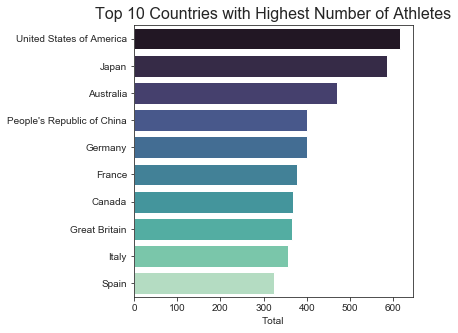

In [6]:
# Visualize the data
sns.set_style("ticks")
plt.figure(figsize=(5,5))
plot_ten = sns.barplot(x='count', y='country',
            data=athletes_top_ten,
            linewidth=1,
            palette=sns.color_palette("mako", n_colors=10))

plt.ylabel('', fontsize=10)
plt.xlabel('Total', fontsize=10)
plt.title('Top 10 Countries with Highest Number of Athletes',fontsize=16)
plt.show()

#### We can observe that USA, Japan, and Australia have the most Athletes competing in Olympics 2020.

## 2. What sports have the most coaches?

In [7]:
# Check on the unique values of coaches
top_sport_coaches = pd.DataFrame(coaches.Discipline.value_counts().reset_index())
top_sport_coaches.columns = ['sport', 'count']
top_sport_coaches

,sport,count
0,Basketball,74
1,Artistic Swimming,69
2,Football,59
3,Hockey,45
4,Volleyball,45
5,Handball,29
6,Baseball/Softball,26
7,Rugby Sevens,25
8,Water Polo,22


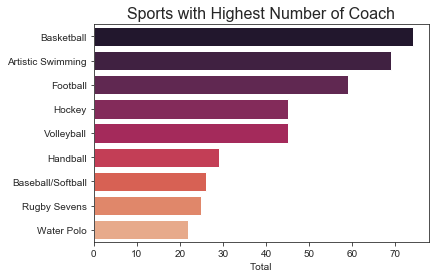

In [82]:
# Visualize the data
sns.barplot(x='count', y='sport', data=top_sport_coaches,
             palette=sns.color_palette("rocket", n_colors=10))
plt.ylabel('', fontsize=10)
plt.xlabel('Total', fontsize=10)
plt.title('Sports with Highest Number of Coach',fontsize=16)
plt.show()

#### We can see that Basketball, Artistic Swimming, and Football have the most coaches number.

## 3. Show the distribution of gender in each sport.

In [46]:
# TO reset
entries_gender = pd.read_excel('./data/EntriesGender.xlsx', index_col = 0)

In [10]:
# Check the head data of entries_gender
entries_gender.head(3)

,Female,Male,Total
Discipline,,,
3x3 Basketball,32,32,64
Archery,64,64,128
Artistic Gymnastics,98,98,196


In [47]:
# Reset the index and add to new var
gender = entries_gender.reset_index()
gender.head(3)

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196


In [48]:
# Check the datatype
gender.Female.dtype

dtype('int64')

In [53]:
# Convert all datatypes of Female, Male, and Total to float
gender.loc[:,['Female', 'Male', 'Total']] = gender.loc[:,['Female', 'Male', 'Total']].astype(float)

In [58]:
# Create ratio columns for female and male
gender['female_ratio'] = gender.Female / gender.Total
gender['male_ratio'] = gender.Male / gender.Total

In [59]:
# Library to support our visualization
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.offline.init_notebook_mode(connected=True)

In [113]:
# Create the base of the graph
fig = go.Figure()

# Add male ratio
fig.add_trace(go.Bar(
                    y = gender.Discipline,
                    x = gender.male_ratio,
                    orientation = 'h',
                    name = 'Male',
                    marker = dict (
                            color='lightblue',
                            line=dict(color='rgba(58, 71, 80, 1.0)')
                    )

))
# Add female ratio
fig.add_trace(go.Bar(
                y = gender.Discipline,
                x = gender.female_ratio,
                orientation ='h',
                name = 'Female',
                marker = dict(
                    color = 'pink',
                    line = dict (color = 'rgba(246, 78, 139, 1.0)')
                )
))


# Style the title of the graph (not important)
template = dict(layout=go.Layout(title_font=dict(family="Rockwell", size=20)))

# Update the layout to add two bars as stacked bar
fig.update_layout(
                title = 'Distribution of Gender in Each Sport',
                barmode='stack', 
                template = template,
                autosize=False,
                width=680,
                height=900,
                margin=dict(
                  l=150,
                  r=100,
                   b=30,
                   t=100,
                   pad=4
                          )
)

# Convert the value to percentage when hover
fig.layout.xaxis.tickformat = ',.0%'
fig.show()

#### We can see that Rhytmic Gymnastic and Arctic Swimming have female participants only. While the others are mixed of Male and Female.

## 4. How many medals do each country gain?

In [129]:
# Check the head of the data
medals.head()

,Country,Gold,Silver,Bronze,Total,Rank by Total
Rank,,,,,,
1,United States of America,39,41,33,113,1
2,People's Republic of China,38,32,18,88,2
3,Japan,27,14,17,58,5
4,Great Britain,22,21,22,65,4
5,ROC,20,28,23,71,3


In [130]:
# Check the dimension of the data
medals.shape

(93, 6)

In [89]:
# Rename the column of team/NOC to avoid error
medals.rename(columns={'Team/NOC':'Country'}, inplace=True)

In [101]:
# Create a copy of the original dataset
medals_final = medals.copy().reset_index()
medals_final = medals_final[medals_final['Rank'] <= 20]

In [122]:
# Create the base of the graph
fig = go.Figure()

# Add gold medal
fig.add_trace(go.Bar(
                x=medals_final.Gold,
                y=medals_final.Country,
    orientation='h',
                name = 'Gold',
                marker = dict(
                            color='rgb(255,215,0)',
                            line =dict (color = 'rgba(12,12,0,0.5)')
                )
))


# Add silver medal
fig.add_trace(go.Bar(
                x=medals_final.Silver,
                y=medals_final.Country,
    orientation='h',
                name = 'Silver',
                marker = dict(
                            color='rgb(192,192,192)',
                            line =dict (color = 'rgba(12,12,0,0.5)')
                )
))


# Add bronze medal
fig.add_trace(go.Bar(
                x=medals_final.Bronze,
                y=medals_final.Country,
    orientation='h',
                name = 'Bronze',
                marker = dict(
                            color='rgb(205, 127, 50)',
                            line =dict (color = 'rgba(0,0,0,0.5)')
                )
))


# Style the title of the graph (not important)
template = dict(layout=go.Layout(title_font=dict(family="Rockwell", size=20)))

# Update the layout to add three bars as stacked bar
fig.update_layout(
                title = 'Top 10 Medals Gained by Country',
                barmode='stack',
                showlegend = False,
                template = template,
                autosize=False,
                width=580,
                height=650,
                margin=dict(
                  l=180,
                  r=100,
                   b=180,
                   t=100,
                   pad=4
                          )
)

# Reverse the order from highest to lowest
fig.update_yaxes(autorange="reversed")
fig.show()

## 5. What is the most attended sport?

In [145]:
# Copy the original data and alter it
teams_final = teams.reset_index()
teams_final = teams_final.drop(columns='NOC')
teams_final.head()

,Name,Discipline,Event
0,Belgium,3x3 Basketball,Men
1,China,3x3 Basketball,Men
2,China,3x3 Basketball,Women
3,France,3x3 Basketball,Women
4,Italy,3x3 Basketball,Women


In [146]:
# Check the dimension of the data
teams_final.shape

(743, 3)

In [179]:
# Count the number of Discipline and add to new var
sport_count = teams_final.groupby('Discipline').count().sort_values('Name', ascending = False).reset_index()

Text(0.5, 1.0, 'Most attended sport by country')

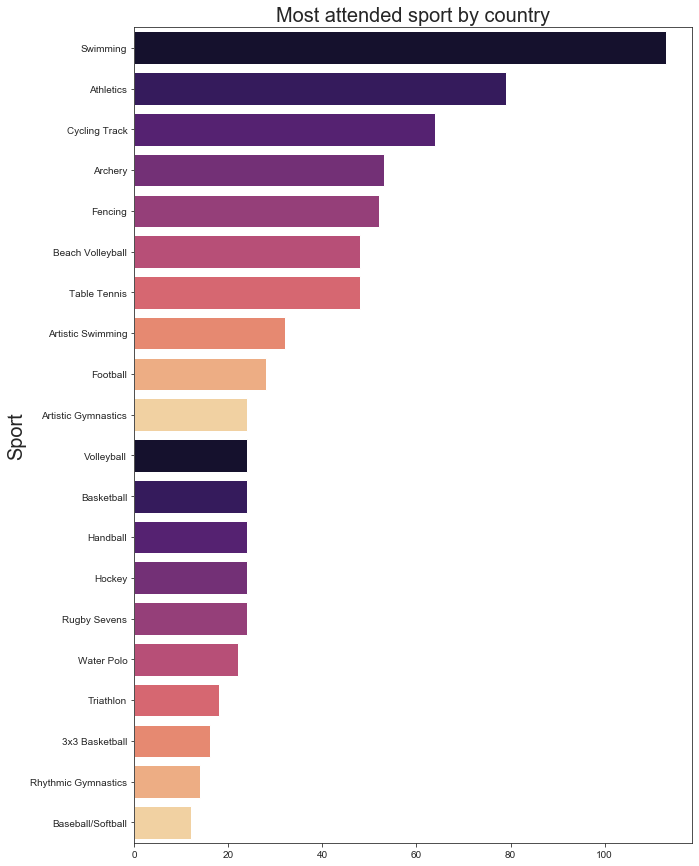

In [192]:
sns.set_style("ticks")
plt.figure(figsize=(10,15))

sns.barplot(x = 'Name', y ='Discipline', data = sport_count,
            palette = sns.color_palette("magma", n_colors= 10))

plt.xlabel("")
plt.ylabel("Sport", fontsize = 20)
plt.title("Most attended sport by country", fontsize = 20)